Both clustering algorithms group the iris flowers into three distinct clusters based on their measurements, allowing for a better understanding of the relationships between the different species. The visualizations provide insight into how the clusters are formed in the reduced dimensional space.

In [ ]:
!pip install pyclustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 26.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395099 sha256=8d08775e4bf943dabcffadde785a4c9aa401728b99c921a5b1a49e77b5b15442
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df66edb4cf69f449
Successfully built pyclustering


Saving IRIS.csv to IRIS (3).csv
Uploaded file: IRIS (3).csv
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Initial Cluster Centers:
 [[ 0.57100359 -0.36600236  0.69108416  0.66322635]
 [-0.80601877  1.33577362 -1.28618375 -1.21026347]
 [-1.31926109 -0.34584225 -1.14482725 -1.1336954 ]]
Final Cluster Labels:
Cluster 1:
     sepal_length  sepal_width  petal_length  petal_width          species
50            7.0          3.2           4.7          1.4  Iris-versicolor
51            6.4          3.2           4.5          1.5  Iris-versicolor
52            6.9          3.1           4.9          1.5  Iris-versicolor
53           

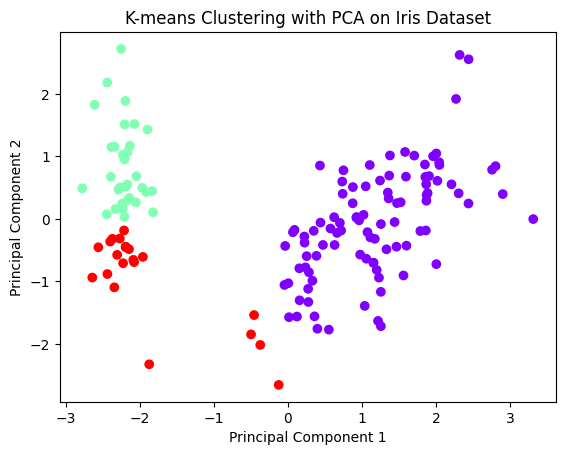

In [ ]:
import pandas as pd
from google.colab import files
import io
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: Upload the dataset
uploaded = files.upload()

# Step 2: Load the dataset into a DataFrame
filename = list(uploaded.keys())[0]
print("Uploaded file:", filename)

# Read the uploaded dataset into a DataFrame
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Check the first few rows of the DataFrame
print(df.head())

# Step 3: Data Preprocessing
# Separate the features and the target labels
features = df.drop('species', axis=1)
labels = df['species']

# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(features)

# Step 4: Apply K-means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)

# Outputs for K-means
print("Initial Cluster Centers:\n", kmeans.cluster_centers_)
print("Final Cluster Labels:")

# Display final clusters with original labels
for cluster in range(3):
    print(f"Cluster {cluster + 1}:")
    print(df[kmeans.labels_ == cluster])

print("Number of Iterations (Epochs):", kmeans.n_iter_)
print("Inertia (Error Rate):", kmeans.inertia_)

# Step 5: Apply PCA for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Scatter plot for K-means
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.title('K-means Clustering with PCA on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Saving IRIS.csv to IRIS (2).csv
Uploaded file: IRIS (2).csv
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Initial Medoids: [120, 20, 134]
Final Medoids: [112, 7, 94]
Cluster Assignments:
Cluster 1:
     sepal_length  sepal_width  petal_length  petal_width          species
50            7.0          3.2           4.7          1.4  Iris-versicolor
51            6.4          3.2           4.5          1.5  Iris-versicolor
52            6.9          3.1           4.9          1.5  Iris-versicolor
54            6.5          2.8           4.6          1.5  Iris-versicolor
56            6.3          3.3           4.7          1.6  

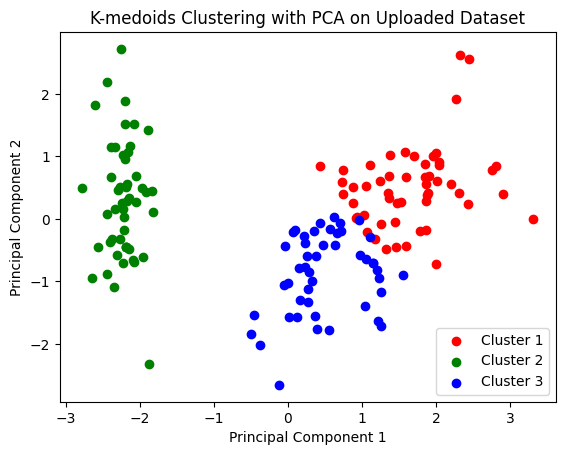

In [ ]:
import pandas as pd
from google.colab import files
import io
from sklearn.preprocessing import StandardScaler
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import distance_metric, type_metric
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
import random

# Step 1: Upload the dataset
uploaded = files.upload()

# Step 2: Load the dataset into a DataFrame
filename = list(uploaded.keys())[0]
print("Uploaded file:", filename)

# Read the uploaded dataset into a DataFrame
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Check the first few rows of the DataFrame
print(df.head())

# Step 3: Data Preprocessing
# Separate the features and the target labels
features = df.drop('species', axis=1)
labels = df['species']

# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(features)

# Step 4: Apply K-medoids Clustering
# Randomly select initial medoids for 3 clusters
initial_medoids = random.sample(range(df_scaled.shape[0]), 3)
metric = distance_metric(type_metric.EUCLIDEAN)
kmedoids_instance = kmedoids(df_scaled, initial_medoids, metric=metric)

# Run K-medoids and get results
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

# Outputs for K-medoids
print("Initial Medoids:", initial_medoids)
print("Final Medoids:", medoids)
print("Cluster Assignments:")

# Display final clusters with original labels
for cluster_index, cluster in enumerate(clusters):
    print(f"Cluster {cluster_index + 1}:")
    print(df.iloc[cluster])  # Displaying the rows of the original DataFrame corresponding to the cluster

# Calculate total cost (error rate)
total_cost = 0
for i, cluster in enumerate(clusters):
    cluster_points = df_scaled[cluster]
    medoid = df_scaled[medoids[i]]
    total_cost += np.sum(cdist(cluster_points, [medoid]))

print("Total Cost (Error Rate):", total_cost)

# Step 5: Apply PCA for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Scatter plot for K-medoids
colors = ['r', 'g', 'b']
for i, cluster in enumerate(clusters):
    cluster_points = df_pca[cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i + 1}')

plt.title('K-medoids Clustering with PCA on Uploaded Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
